In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##
1) Top 5 most popular artists
2) Top longest songs
3) Top trending genre
4) Top 5 most danceable songs
5) finding correlation between the variables and vizualize it
6) ploting the regression chart for the variables with the highest correlation
7) Use of streamlit

In [2]:
data = pd.read_csv("dataset.csv")
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
#Preprocessing And Cleaning

In [4]:
df = data.drop("Unnamed: 0", axis=1)

In [5]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113550 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113550 non-null  int64  
 5   duration_ms       113550 non-null  int64  
 6   explicit          113550 non-null  bool   
 7   danceability      113550 non-null  float64
 8   energy            113550 non-null  float64
 9   key               113550 non-null  int64  
 10  loudness          113550 non-null  float64
 11  mode              113550 non-null  int64  
 12  speechiness       113550 non-null  float64
 13  acousticness      113550 non-null  float64
 14  instrumentalness  113550 non-null  float64
 15  liveness          113550 non-null  float64
 16  valence           113550 

In [9]:
df.shape

(113550, 20)

In [10]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [11]:
df["duration_ms"]= df["duration_ms"].replace("durations_ms", )

In [12]:
len(df.columns)

20

##
Data analysis (indights on data)
1. top 5 popular artists

In [13]:
popular_artists = df.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:5]
popular_artists

artists
The Beatles        279
George Jones       260
Stevie Wonder      235
Linkin Park        224
Ella Fitzgerald    221
Name: popularity, dtype: int64

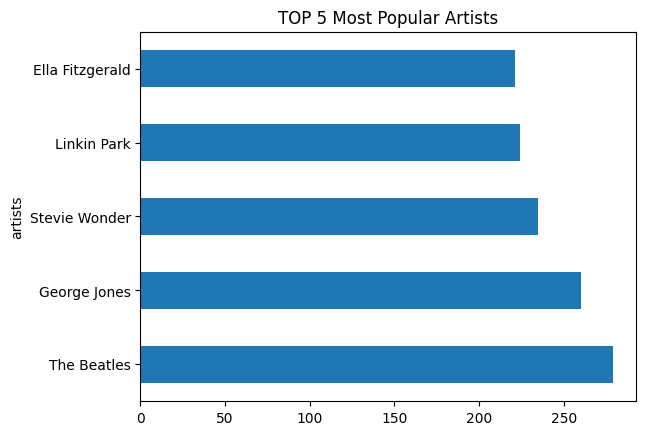

In [14]:
popular_artists.plot.barh() ##visualize the data
plt.title("TOP 5 Most Popular Artists")
plt.show()

2.top 5 longest songs or tracks

In [15]:
long_songs = df[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
long_songs

,track_name,duration_ms
73617,Unity (Voyage Mix) Pt. 1,5237295
10935,Crossing Wires 002 - Continuous DJ Mix,4789026
24348,The Lab 03 - Continuous DJ Mix Part 1,4730302
73840,Amnesia Ibiza Underground 10 DJ Mix,4563897
13344,House of Om - Mark Farina - Continuous Mix,4447520


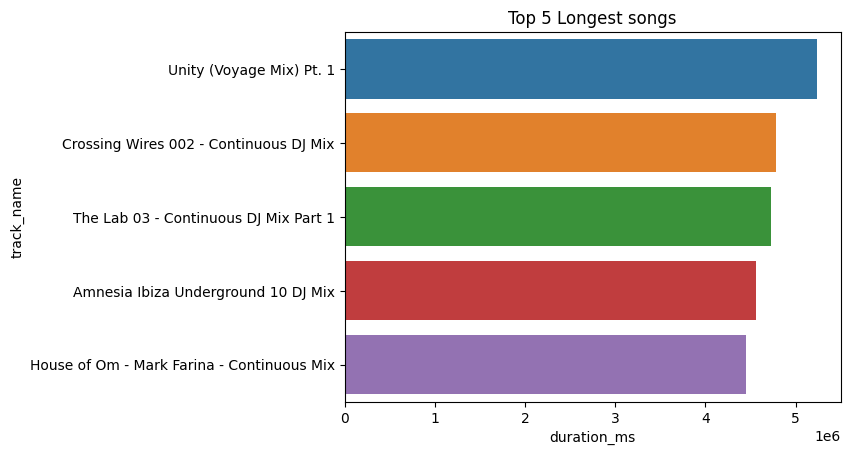

In [16]:
sns.barplot(x="duration_ms", y="track_name", data= long_songs)
plt.title("Top 5 Longest songs")
plt.show()

3.top 5 most trending genre

In [17]:
trend_genre = df[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:5]
trend_genre

,track_genre,popularity
20001,dance,100
81051,pop,100
51664,hip-hop,99
20008,dance,98
30003,edm,98


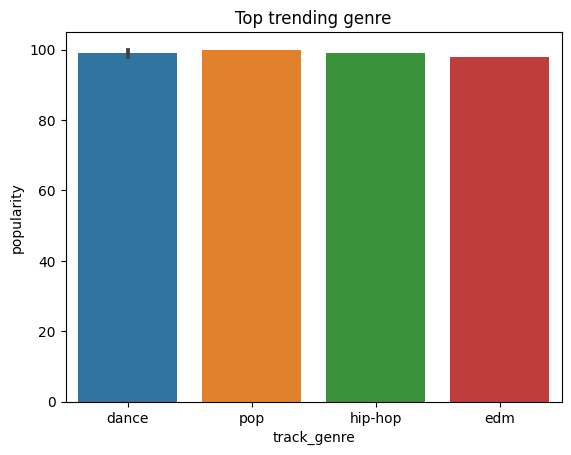

In [18]:
sns.barplot(x="track_genre",y="popularity", data=trend_genre)
plt.title("Top trending genre")
plt.show()

4.top 5 most danceable genre

In [19]:
danceable = df[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable

,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
13353,Bitches,dj funk,0.981


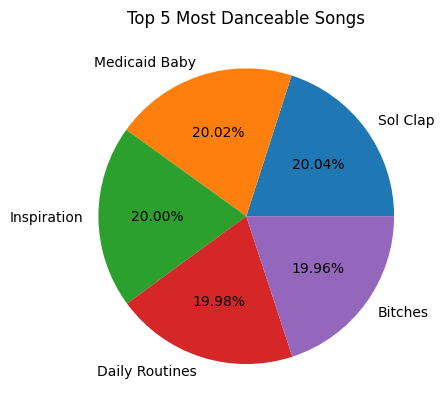

In [20]:
plt.pie(x="danceability", data=danceable, autopct='%1.2f%%', labels=danceable.track_name)
plt.title("Top 5 Most Danceable Songs")
plt.show()

##Finding corrolation between the variables

In [21]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113550.000000,1.135500e+05,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000
mean,33.324139,2.280794e+05,0.567031,0.642090,5.309467,-8.243419,0.637860,0.084674,0.314067,0.155702,0.213611,0.474207,122.175888,3.904218
std,22.283976,1.064148e+05,0.173408,0.251052,3.560134,5.011401,0.480621,0.105761,0.331907,0.309216,0.190461,0.259204,29.972861,0.432115
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741802e+05,0.456000,0.473000,2.000000,-9.997750,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296500,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615878e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048675,0.273000,0.683000,140.073750,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [22]:
numeric_columns = df.select_dtypes(include=[float, int]).columns
df_numeric = df[numeric_columns]
corr_table = df_numeric.corr(method="pearson") #get variables the correlation

In [23]:
corr_table

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007899,0.034412,-0.002444,-0.004174,0.047371,-0.014991,-0.045459,-0.022370,-0.094711,-0.005658,-0.041109,0.012180,0.030564
duration_ms,-0.007899,1.000000,-0.074108,0.058163,0.008510,-0.004228,-0.035935,-0.063188,-0.103695,0.125307,0.010213,-0.154810,0.024301,0.018347
danceability,0.034412,-0.074108,1.000000,0.131695,0.036544,0.256559,-0.069778,0.108237,-0.169183,-0.183972,-0.131648,0.476750,-0.051518,0.207369
energy,-0.002444,0.058163,0.131695,1.000000,0.048046,0.760624,-0.079328,0.141976,-0.732745,-0.179966,0.184812,0.258448,0.247360,0.186671
key,-0.004174,0.008510,0.036544,0.048046,1.000000,0.038358,-0.135876,0.020819,-0.041119,-0.006821,-0.001521,0.034237,0.010905,0.015123
loudness,0.047371,-0.004228,0.256559,0.760624,0.038358,1.000000,-0.042071,0.060088,-0.588110,-0.432108,0.076793,0.279424,0.212180,0.191648
mode,-0.014991,-0.035935,-0.069778,-0.079328,-0.135876,-0.042071,1.000000,-0.046770,0.096534,-0.050780,0.013909,0.021399,0.000364,-0.024367
speechiness,-0.045459,-0.063188,0.108237,0.141976,0.020819,0.060088,-0.046770,1.000000,-0.001381,-0.089213,0.205092,0.036391,0.017166,-0.000398
acousticness,-0.022370,-0.103695,-0.169183,-0.732745,-0.041119,-0.588110,0.096534,-0.001381,1.000000,0.102129,-0.020321,-0.106228,-0.207613,-0.175618
instrumentalness,-0.094711,0.125307,-0.183972,-0.179966,-0.006821,-0.432108,-0.050780,-0.089213,0.102129,1.000000,-0.079843,-0.324316,-0.049941,-0.081951


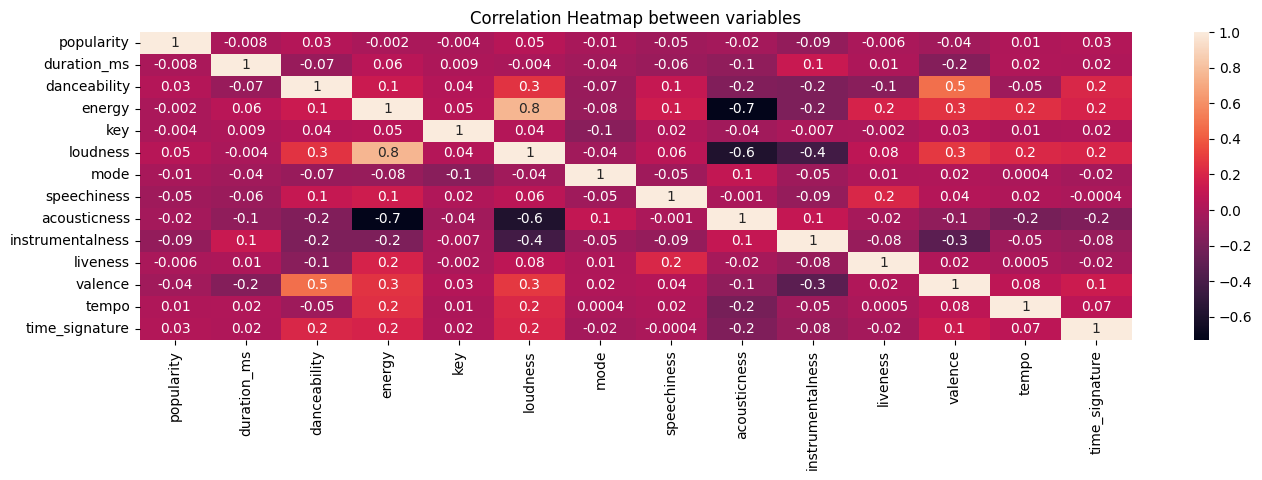

In [24]:
###plotting the correlation table using seaborn
plt.figure(figsize=(16,4))
sns.heatmap(corr_table, annot=True, fmt=".1g")
plt.title("Correlation Heatmap between variables")
plt.show() #display the plot

##
The Highest Correlation:
is between loudness and energy
let's verify this assumption using a regression plot of the correlation between loudness and energy

In [25]:
sample = df.sample(int(0.01 * len(df))) #sample the data for further use
len(sample) #size of the sample

1135

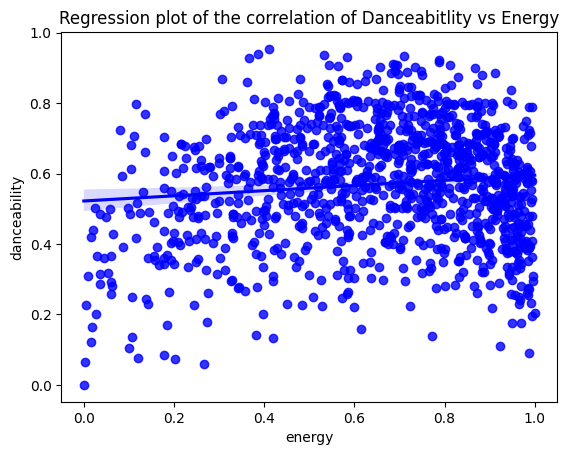

In [26]:
###ploting the regression
sns.regplot(data=sample, y="danceability", x="energy", color="b")
plt.title("Regression plot of the correlation of Danceabitlity vs Energy")
plt.show()

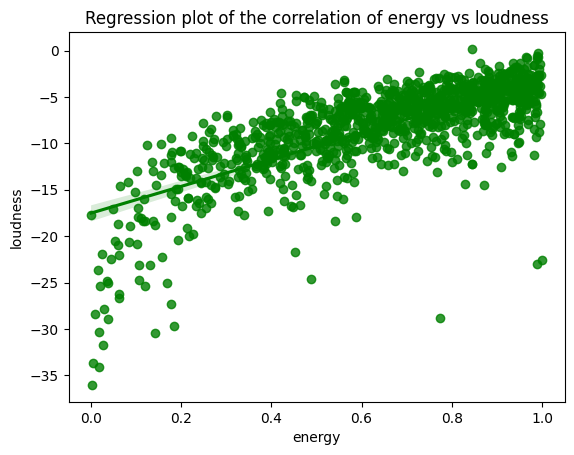

In [27]:
sns.regplot(data=sample, y="loudness", x="energy", color="g")
plt.title("Regression plot of the correlation of energy vs loudness")
plt.show()

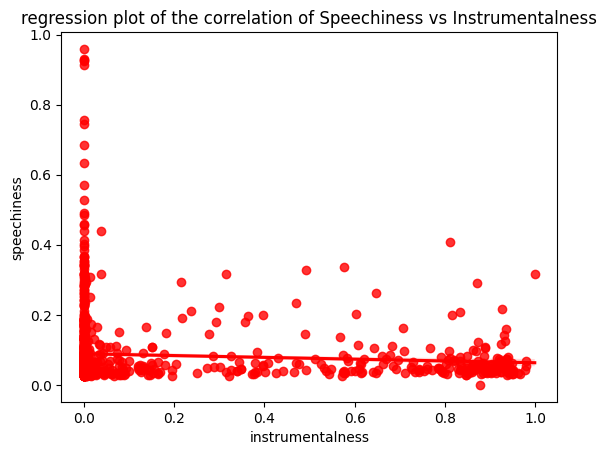

In [28]:
sns.regplot(data=sample, y="speechiness", x="instrumentalness", color="r")
plt.title("regression plot of the correlation of Speechiness vs Instrumentalness")
plt.show()

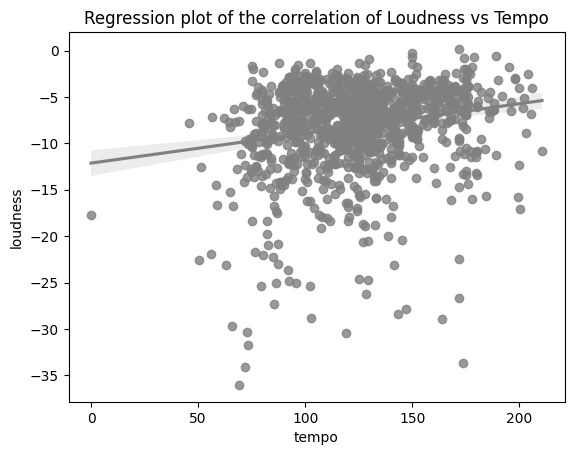

In [29]:
sns.regplot(data=sample, y="loudness", x="tempo", color="gray")
plt.title("Regression plot of the correlation of Loudness vs Tempo")
plt.show()